# Importing Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\simpe\Citi Bike Analysis'

In [4]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_5.csv'), index_col = False)

In [5]:
station =pd.read_csv(os.path.join(path, '02 Data','prepared data', 'bike_station.csv'), index_col = False)

In [6]:
station.head()

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,0,72,40.767272,-73.993929,5.642857
1,1,79,40.719116,-74.006667,4.357143
2,2,82,40.711174,-74.000165,2.185185
3,3,83,40.683826,-73.976323,2.571429
4,4,116,40.741776,-74.001497,8.966667


In [7]:
columns_to_drop_1=['Unnamed: 0']

In [8]:
station

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,0,72,40.767272,-73.993929,5.642857
1,1,79,40.719116,-74.006667,4.357143
2,2,82,40.711174,-74.000165,2.185185
3,3,83,40.683826,-73.976323,2.571429
4,4,116,40.741776,-74.001497,8.966667
...,...,...,...,...,...
325,325,2017,40.750224,-73.971214,3.000000
326,326,2021,40.759291,-73.988597,5.357143
327,327,2022,40.758491,-73.959206,3.310345
328,328,2023,40.759681,-73.970314,3.217391


In [9]:
citi.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'day_of_week', 'start_hour', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'ride_start',
       'ride_end', 'Trip category', 'ride_start_date', 'ride_start_time'],
      dtype='object')

In [10]:
#getting rid of un needed columns
citi_1=citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [11]:
citi_1

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,18:18:55
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,18:38:53
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,19:44:04
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,11:54:37
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,22:01:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,1,2013-09-28 15:30:14,2013-09-28 15:46:29,10-20 minutes,2013-09-28,15:30:14
42989,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,1,2013-09-01 16:27:11,2013-09-01 16:52:52,over 20 minutes,2013-09-01,16:27:11
42990,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2,2013-09-14 17:32:26,2013-09-14 17:52:17,10-20 minutes,2013-09-14,17:32:26
42991,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2,2013-09-07 18:08:21,2013-09-07 18:25:51,10-20 minutes,2013-09-07,18:08:21


# Cleaning Data

In [12]:
citi_1.describe()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000
mean,14.085316,437.205545,40.734477,-73.990948,434.577094,40.734070,-73.991242,770.502105,1975.674459,1.247854
std,4.932889,340.848654,0.019598,0.012367,332.801118,0.019603,0.012375,523.444233,10.938735,0.431880
min,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000,0.000000
25%,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,395.000000,1968.000000,1.000000
50%,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,621.000000,1978.000000,1.000000
75%,18.000000,485.000000,40.749718,-73.981948,483.000000,40.749013,-73.982578,999.000000,1984.000000,1.000000
max,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


C:\Users\simpe\AppData\Local\Temp\ipykernel_3980\1169923457.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citi_1['trip_duration'], bins=60) # Shows extreme values


<Axes: xlabel='trip_duration', ylabel='Density'>

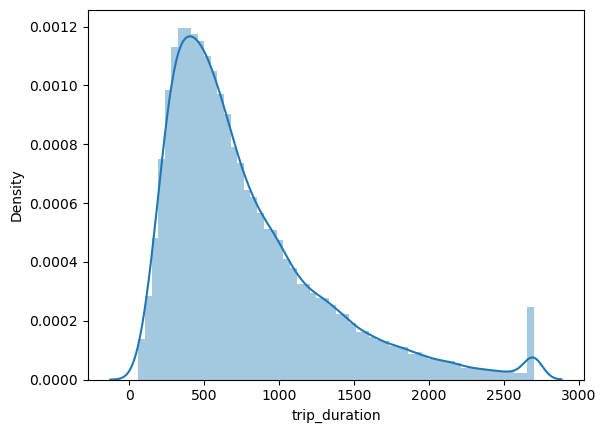

In [13]:
sns.distplot(citi_1['trip_duration'], bins=60) # Shows extreme values

In [14]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [15]:
file_path = os.path.join(path, '02 Data','prepared data','citi_5.csv')

In [16]:
parse_dates = ['ride_start_date']

In [17]:
citi_1 = pd.read_csv(file_path, parse_dates=parse_dates)

In [18]:
# amount of rides taken on each hour of each day
hour_counts = citi_1.groupby(['start_hour',citi_1['ride_start_date'].dt.date])['ride_start_date'].count()

In [19]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         15
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         13
                               ..
23          2013-09-26         38
            2013-09-27         44
            2013-09-28         48
            2013-09-29         21
            2013-09-30         17
Name: ride_start_date, Length: 711, dtype: int64

In [20]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [21]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [22]:
# rides per day 
day_counts = citi.groupby('day_of_week')['ride_start_date'].count()

In [23]:
day_counts

day_of_week
Fri    6594
Mon    6797
Sat    4965
Sun    5506
Thu    6212
Tue    6429
Wed    6490
Name: ride_start_date, dtype: int64

In [24]:
# rides per hour on each day of the week
day_hour_counts = citi_1.groupby([ 'day_of_week','start_hour'])['ride_start_date'].count()

In [25]:
day_hour_counts

day_of_week  start_hour
Fri          0              48
             1              36
             2              23
             3              10
             4              10
                          ... 
Wed          19            479
             20            297
             21            213
             22            188
             23            103
Name: ride_start_date, Length: 168, dtype: int64

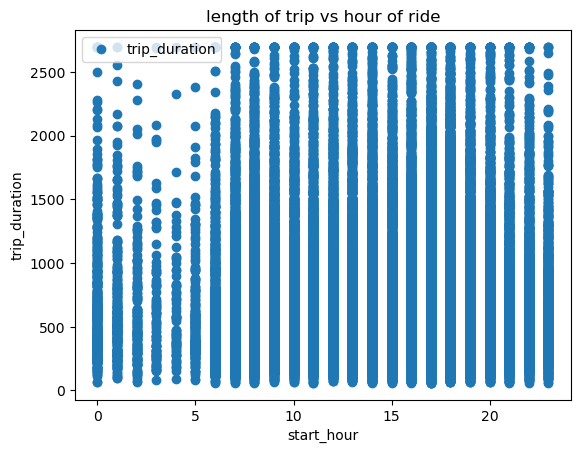

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'start_hour', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

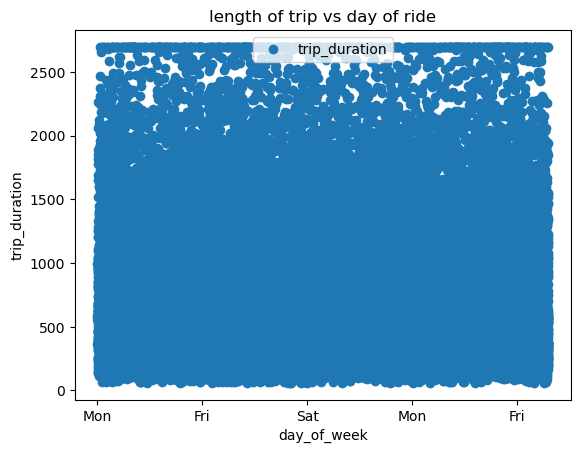

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'day_of_week', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs day of ride')  
plt.xlabel('day_of_week')  
plt.ylabel('trip_duration')  
plt.show()

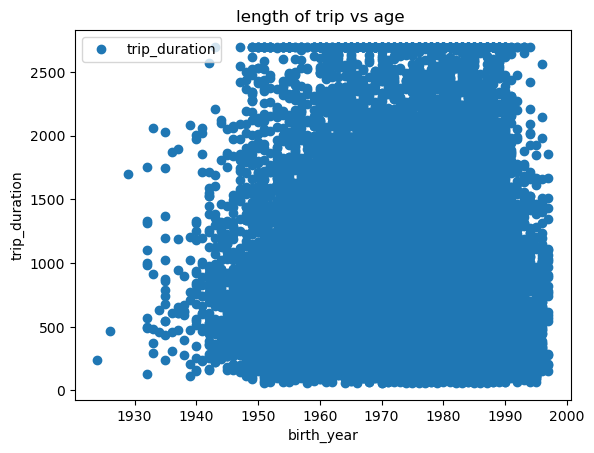

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

citi_1.plot(x = 'birth_year', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('length of trip vs age ')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

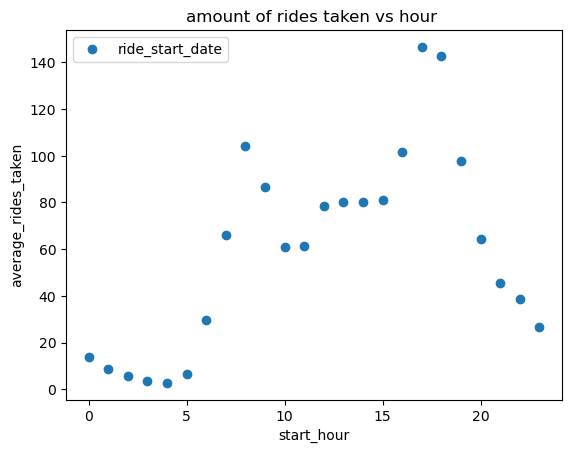

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

avg_rides_per_hour.plot(x = 'start_hour', y='ride_start_date',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('average_rides_taken')  
plt.show()

In [30]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [31]:
citi_1.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'day_of_week', 'start_hour', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'ride_start',
       'ride_end', 'Trip category', 'ride_start_date', 'ride_start_time'],
      dtype='object')

In [32]:
ride_counts = pd.get_dummies(citi_1, columns=['day_of_week', 'start_hour'], drop_first=True)

In [33]:
ride_counts

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,0,0,0,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,False,False,False,False,True,False,False,False,False,False
1,1,1,1,1,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,False,False,False,False,True,False,False,False,False,False
2,2,2,2,2,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,False,False,False,False,False,True,False,False,False,False
3,3,3,3,3,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,False,False,False,False,False,False,False,False,False,False
4,4,4,4,4,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,42988,42988,42988,42988,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,...,False,True,False,False,False,False,False,False,False,False
42989,42989,42989,42989,42989,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,...,False,False,True,False,False,False,False,False,False,False
42990,42990,42990,42990,42990,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,...,False,False,False,True,False,False,False,False,False,False
42991,42991,42991,42991,42991,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,...,False,False,False,False,True,False,False,False,False,False


In [34]:
ride_counts.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time',
       'day_of_week_Mon', 'day_of_week_Sat', 'day_of_week_Sun',
       'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed', 'start_hour_1',
       'start_hour_2', 'start_hour_3', 'start_hour_4', 'start_hour_5',
       'start_hour_6', 'start_hour_7', 'start_hour_8', 'start_hour_9',
       'start_hour_10', 'start_hour_11', 'start_hour_12', 'start_hour_13',
       'start_hour_14', 'start_hour_15', 'start_hour_16', 'start_hour_17',
       'start_hour_18', 'start_hour_19', 'start_hour_20', 'start_hour_21',
       'start_hour_22', 'start_hour_23'],
      dtype='object')

In [35]:
# rides per hour count
rides_per_hour_count = hour_counts.groupby('start_hour').count().reset_index()

In [36]:
# amount of rides taken on each hour of each day
hour_counts_1 = citi_1.groupby('start_hour')['ride_start_date'].count()

In [37]:
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1827
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4280
19    2930
20    1932
21    1371
22    1159
23     803
Name: ride_start_date, dtype: int64

In [38]:
# on each hour how many rides occured and then the avg duration of those rides
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'ride_start_date': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

In [39]:
hourly_aggregated

,start_hour,ride_start_date,trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


In [40]:
#changing column names
hourly_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [41]:
hourly_aggregated

,start_hour,ride_count,avg_trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


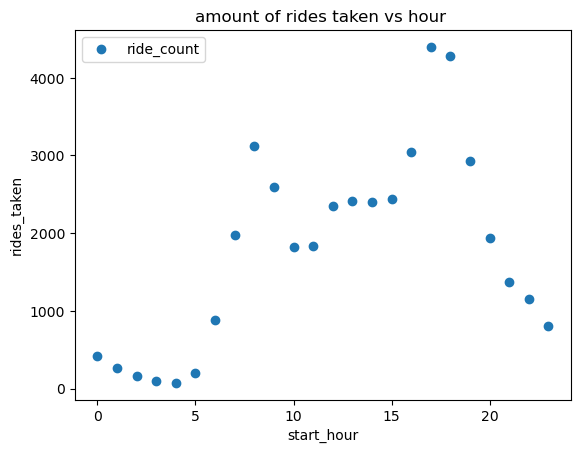

In [42]:
#plt for rides taken and hour
hourly_aggregated.plot(x = 'start_hour', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_taken')  
plt.show()

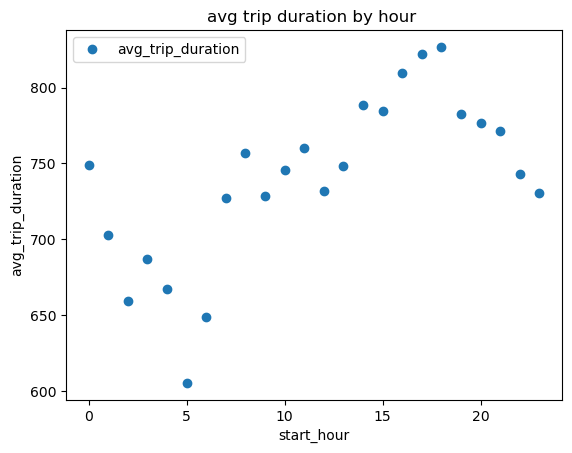

In [43]:
# plot for trip duration and by hour
hourly_aggregated.plot(x = 'start_hour', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

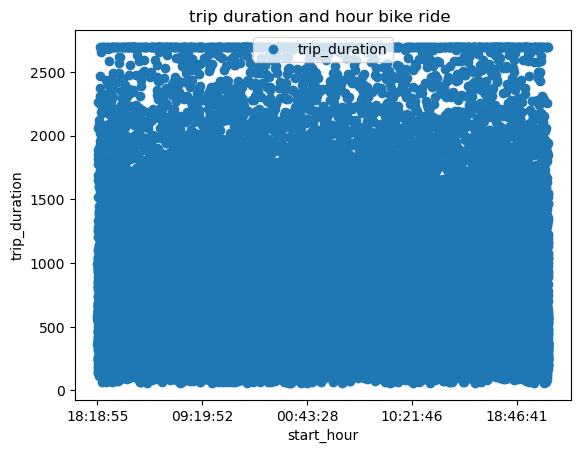

In [44]:
# plot for trip duration and hour but nt categorized
citi_1.plot(x = 'ride_start_time', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [45]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.3             42993 non-null  int64         
 1   Unnamed: 0.2             42993 non-null  int64         
 2   Unnamed: 0.1             42993 non-null  int64         
 3   Unnamed: 0               42993 non-null  int64         
 4   day_of_week              42993 non-null  object        
 5   start_hour               42993 non-null  int64         
 6   start_station_id         42993 non-null  int64         
 7   start_station_name       42993 non-null  object        
 8   start_station_latitude   42993 non-null  float64       
 9   start_station_longitude  42993 non-null  float64       
 10  end_station_id           42993 non-null  int64         
 11  end_station_name         42993 non-null  object        
 12  end_station_latitude     42993 n

In [46]:
# Define data types for specific columns
data_types = {
    'ride_start_time': 'datetime64'
}

In [47]:
file_path_1 = os.path.join(path, '02 Data','prepared data','citi_5.csv')

In [48]:
parse_dates = ['ride_start_time']

In [53]:
import pandas as pd

# Directly specify the date format in the read_csv function
citi_1 = pd.read_csv(file_path_1, parse_dates=parse_dates, date_format='2024-08-14')  # Adjust the format as needed


In [54]:
citi_1 = pd.read_csv(file_path_1, parse_dates=parse_dates)

C:\Users\simpe\AppData\Local\Temp\ipykernel_3980\70117265.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  citi_1 = pd.read_csv(file_path_1, parse_dates=parse_dates)


In [55]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.3             42993 non-null  int64         
 1   Unnamed: 0.2             42993 non-null  int64         
 2   Unnamed: 0.1             42993 non-null  int64         
 3   Unnamed: 0               42993 non-null  int64         
 4   day_of_week              42993 non-null  object        
 5   start_hour               42993 non-null  int64         
 6   start_station_id         42993 non-null  int64         
 7   start_station_name       42993 non-null  object        
 8   start_station_latitude   42993 non-null  float64       
 9   start_station_longitude  42993 non-null  float64       
 10  end_station_id           42993 non-null  int64         
 11  end_station_name         42993 non-null  object        
 12  end_station_latitude     42993 n

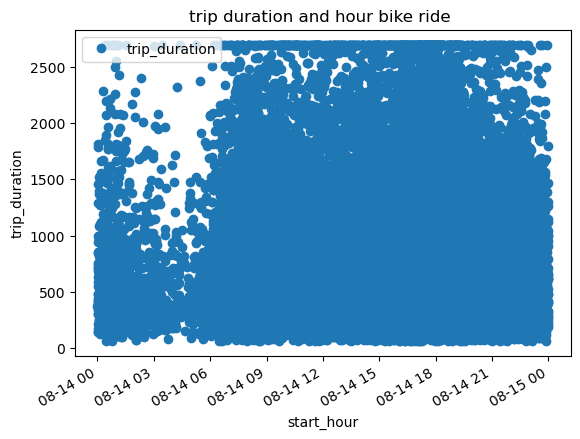

In [56]:
citi_1.plot(x = 'ride_start_time', y='trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [57]:
# rides by hour ride count and avg trip duration
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'ride_start_date': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

In [58]:
hourly_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_hour       24 non-null     int64  
 1   ride_start_date  24 non-null     int64  
 2   trip_duration    24 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 708.0 bytes


In [59]:
# making columns 
hourly_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

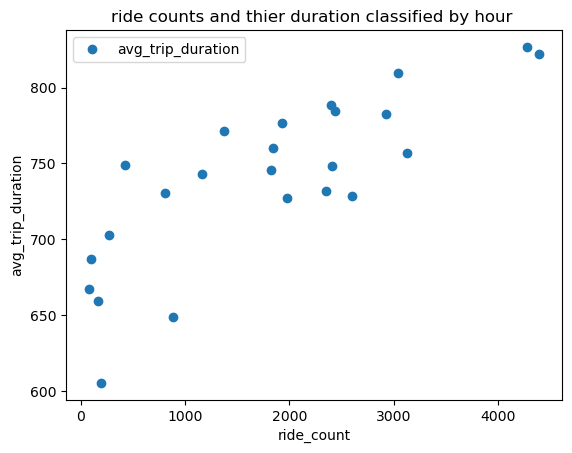

In [60]:
#plot for avg trip duration and ride count
hourly_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [61]:
#using iqr method to look for outliers
q1=hourly_aggregated['ride_count'].quantile(0.25)#first Quartile
q3=hourly_aggregated['ride_count'].quantile(0.75)#third Quartile
iqr = q3-q1

In [62]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [63]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [64]:
outliers

,start_hour,ride_count,avg_trip_duration


In [65]:
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)#first Quartile
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [66]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [67]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [68]:
# there are outliers!
outliers_1

,start_hour,ride_count,avg_trip_duration
5,5,195,605.348718


In [69]:
#finding outliers in the main dateset
q1=citi_1['trip_duration'].quantile(0.25)#first Quartile
q3=citi_1['trip_duration'].quantile(0.75)#third Quartile
iqr = q3-q1

In [70]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [71]:
outliers_2 = citi_1[(citi_1['trip_duration'] < lower_bound) | (citi_1['trip_duration'] > upper_bound)]

In [72]:
outliers_2

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
27,27,27,27,27,Thu,16,471,Grand St & Havemeyer St,40.712868,-73.956981,...,-74.002950,2057,Subscriber,1954.0,1,2013-09-19 16:35:39,2013-09-19 17:09:56,over 20 minutes,2013-09-19,2024-08-14 16:35:39
55,55,55,55,55,Wed,17,469,Broadway & W 53 St,40.763441,-73.982681,...,-73.967510,2262,Subscriber,1979.0,2,2013-09-11 17:11:27,2013-09-11 17:49:09,over 20 minutes,2013-09-11,2024-08-14 17:11:27
179,179,179,179,179,Mon,14,342,Columbia St & Rivington St,40.717400,-73.980166,...,-73.980166,2093,Subscriber,1960.0,2,2013-09-09 14:38:39,2013-09-09 15:13:32,over 20 minutes,2013-09-09,2024-08-14 14:38:39
183,183,183,183,183,Tue,10,391,Clark St & Henry St,40.697601,-73.993446,...,-73.988557,2124,Subscriber,1957.0,1,2013-09-24 10:32:52,2013-09-24 11:08:16,over 20 minutes,2013-09-24,2024-08-14 10:32:52
197,197,197,197,197,Thu,17,2006,Central Park S & 6 Ave,40.765909,-73.976342,...,-73.976342,2251,Subscriber,1963.0,1,2013-09-05 17:31:47,2013-09-05 18:09:18,over 20 minutes,2013-09-05,2024-08-14 17:31:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42837,42837,42837,42837,42837,Sun,18,448,W 37 St & 10 Ave,40.756604,-73.997901,...,-74.002777,2697,Subscriber,1990.0,2,2013-09-08 18:32:27,2013-09-08 19:22:58,over 20 minutes,2013-09-08,2024-08-14 18:32:27
42902,42902,42902,42902,42902,Tue,7,278,Concord St & Bridge St,40.697666,-73.984764,...,-73.977225,2252,Subscriber,1976.0,2,2013-09-10 07:47:03,2013-09-10 08:24:35,over 20 minutes,2013-09-10,2024-08-14 07:47:03
42903,42903,42903,42903,42903,Sun,16,242,Flushing Ave & Carlton Ave,40.697883,-73.973503,...,-73.984907,2697,Subscriber,1965.0,1,2013-09-22 16:10:00,2013-09-22 17:25:53,over 20 minutes,2013-09-22,2024-08-14 16:10:00
42909,42909,42909,42909,42909,Mon,16,493,W 45 St & 6 Ave,40.756800,-73.982912,...,-73.971212,2697,Subscriber,1968.0,1,2013-09-09 16:13:08,2013-09-09 17:13:59,over 20 minutes,2013-09-09,2024-08-14 16:13:08


In [73]:
outliers_2.shape

(1976, 23)

In [74]:
citi_1.shape

(42993, 23)

In [75]:
#removing outliers
filtered_citi = citi_1[(citi_1['trip_duration'] >= lower_bound) & (citi_1['trip_duration'] <= upper_bound)]

In [76]:
filtered_citi.shape

(41017, 23)

In [77]:
# day of week and ride count
day_counts = citi_1.groupby('day_of_week')['ride_start_date'].count().reset_index()

In [78]:
day_counts

,day_of_week,ride_start_date
0,Fri,6594
1,Mon,6797
2,Sat,4965
3,Sun,5506
4,Thu,6212
5,Tue,6429
6,Wed,6490


In [79]:
# day of week ride count and avg trip duration
daily_aggregated = citi_1.groupby('day_of_week').agg({
    'ride_start_date': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

In [80]:
daily_aggregated

,day_of_week,ride_start_date,trip_duration
0,Fri,6594,764.061723
1,Mon,6797,761.585552
2,Sat,4965,804.035045
3,Sun,5506,814.107701
4,Thu,6212,750.656632
5,Tue,6429,749.886452
6,Wed,6490,763.153621


In [81]:
#changing column names
daily_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

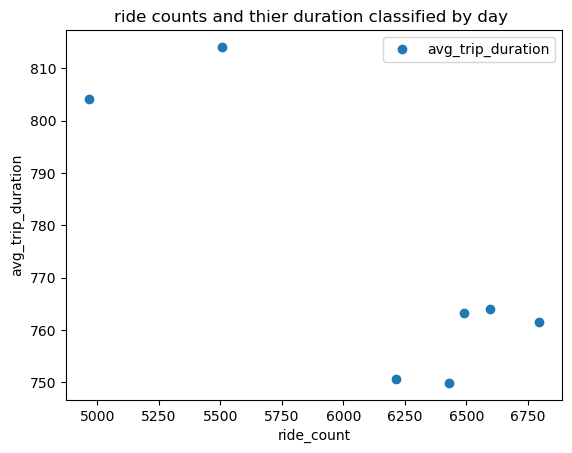

In [82]:
# ride counts and avg trip duration by day
daily_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by day ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

# Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [83]:
X = hourly_aggregated['ride_count'].values.reshape(-1,1)
y = hourly_aggregated['avg_trip_duration'].values.reshape(-1,1)

In [84]:
X

array([[ 420],
       [ 266],
       [ 162],
       [  96],
       [  75],
       [ 195],
       [ 889],
       [1980],
       [3127],
       [2598],
       [1827],
       [1841],
       [2353],
       [2408],
       [2401],
       [2436],
       [3046],
       [4398],
       [4280],
       [2930],
       [1932],
       [1371],
       [1159],
       [ 803]], dtype=int64)

In [85]:
y

array([[748.71666667],
       [702.65789474],
       [659.5617284 ],
       [687.02083333],
       [667.10666667],
       [605.34871795],
       [648.61304837],
       [727.03838384],
       [756.59545891],
       [728.34603541],
       [745.68472906],
       [760.06518197],
       [732.08372291],
       [748.19684385],
       [788.49979175],
       [784.35057471],
       [809.88345371],
       [822.30832196],
       [826.91121495],
       [782.3105802 ],
       [776.41252588],
       [771.61050328],
       [742.78947368],
       [730.1992528 ]])

### Split data into a training set and a test set.

In [86]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Create a regression object.

In [87]:
# Create a regression object.

regression = LinearRegression() 

### Fit the regression object onto the training set.

In [88]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

### Create a plot that shows the regression line from the model on the test set.

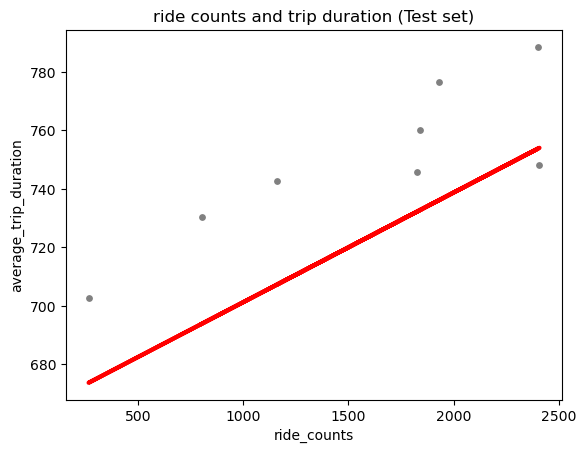

In [90]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('ride counts and trip duration (Test set)')
plot_test.xlabel('ride_counts')
plot_test.ylabel('average_trip_duration')
plot_test.show()

### The regression line shows a positive trend, indicating that as the number of rides increases, the average ride duration tends to be longer. However, despite this upward slope, the line doesn't fit closely to the data points.

In [91]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [92]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03746822]]
Mean squared error:  901.4575617946246
R2 score:  -0.44678846872967615


In [93]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,760.065182,732.755282
1,745.684729,732.230727
2,742.789474,707.201956
3,788.499792,753.737485
4,776.412526,736.164890
5,702.657895,673.742836
6,748.196844,753.999763
7,730.199253,693.863270


## This model did not perform well on the test set. When we compare the actual data to the predictions, there's a significant discrepancy, and we're off by several seconds. The high MSE score further suggests that the model isn't capturing a strong relationship.Potential biases could stem from inaccurately recorded rides—either cut short, not logged out, or excessively long.

## Given this, I believe it's challenging for a linear regression model to establish a relationship with just two numeric variables in this dataset. The data seems to have a more categorical nature, such as rides by day of the week or hour, or demographic factors like subscriber gender and age.

# Saving to CSV

In [94]:
# saving to csv
citi_1.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_6.csv'))

In [95]:
# running the regression again with a filtered DF
hourly_aggregated_filtered = filtered_citi.groupby('start_hour').agg({
    'ride_start_date': 'count',          # Count of rides
    'trip_duration': 'mean'              # Average trip duration
}).reset_index()

In [96]:
hourly_aggregated_filtered

,start_hour,ride_start_date,trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041
5,5,191,570.586387
6,6,863,598.979143
7,7,1908,668.484277
8,8,3023,705.284155
9,9,2504,668.774760


In [97]:
#rename columns
hourly_aggregated_filtered.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

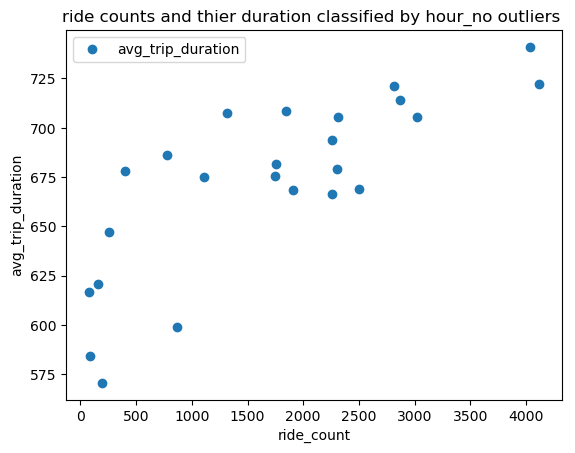

In [98]:
#plot with DF set with no outliers
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [99]:
#reshaping values
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [100]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [101]:
# Create a regression object.

regression = LinearRegression() 

In [102]:
# Fit the regression object onto the training set.

regression.fit(X_1_train, y_1_train)

LinearRegression()

In [103]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

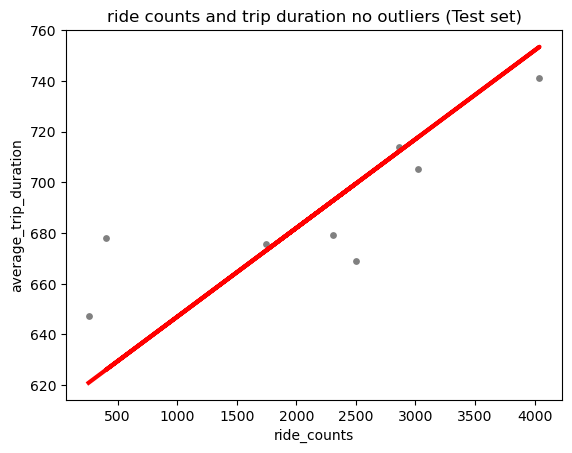

In [104]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

### There is no change. Still a positive regression.

In [105]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [106]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


In [107]:
# Create a dataframe comparing the actual and predicted values of y.

data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,760.065182,732.755282
1,745.684729,732.230727
2,742.789474,707.201956
3,788.499792,753.737485
4,776.412526,736.164890
5,702.657895,673.742836
6,748.196844,753.999763
7,730.199253,693.863270


# No signifigant difference when outliers were removed

In [108]:
hourly_aggregated_filtered.head()

,start_hour,ride_count,avg_trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041


In [109]:
citi_1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-08-14 18:18:55
1,1,1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-08-14 18:38:53
2,2,2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-08-14 19:44:04
3,3,3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-08-14 11:54:37
4,4,4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-08-14 22:01:01


In [110]:
citi_clean=citi_1[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [111]:
hourly_aggregated_filtered.head()

,start_hour,ride_count,avg_trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041


In [112]:
# Changing trip duration from seconds to minutes
hourly_aggregated_filtered['avg_trip_duration_min']=hourly_aggregated_filtered['avg_trip_duration']/60

In [113]:
hourly_aggregated_filtered

,start_hour,ride_count,avg_trip_duration,avg_trip_duration_min
0,0,403,677.868486,11.297808
1,1,257,647.210117,10.786835
2,2,158,620.936709,10.348945
3,3,90,584.422222,9.740370
4,4,73,616.589041,10.276484
5,5,191,570.586387,9.509773
6,6,863,598.979143,9.982986
7,7,1908,668.484277,11.141405
8,8,3023,705.284155,11.754736
9,9,2504,668.774760,11.146246


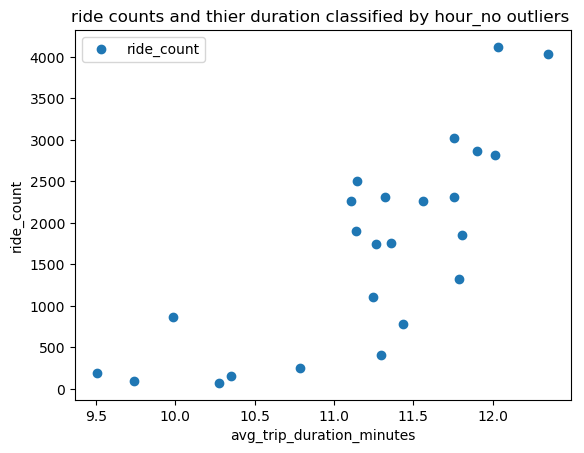

In [114]:
# plot with no outliers
hourly_aggregated_filtered.plot(x = 'avg_trip_duration_min', y='ride_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('avg_trip_duration_minutes')  
plt.ylabel('ride_count')  
plt.show()

In [115]:
X_1 = hourly_aggregated_filtered['avg_trip_duration_min'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)

In [116]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_1_predicted = regression.predict(X_1_test)

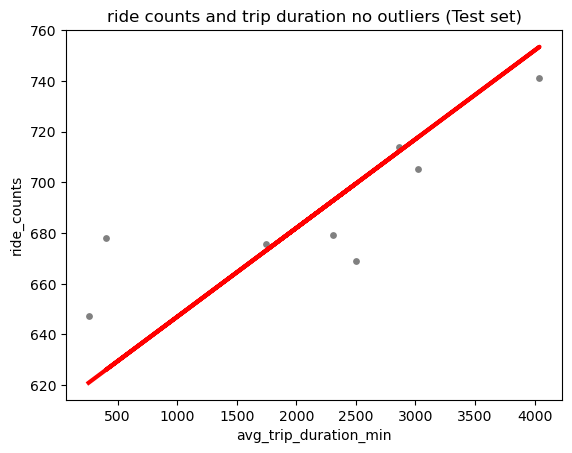

In [117]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('avg_trip_duration_min')
plot_test_1.ylabel('ride_counts')
plot_test_1.show()

In [118]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [119]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


In [120]:
ride_counts.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,0,0,0,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,...,False,False,False,False,True,False,False,False,False,False
1,1,1,1,1,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,...,False,False,False,False,True,False,False,False,False,False
2,2,2,2,2,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,...,False,False,False,False,False,True,False,False,False,False
3,3,3,3,3,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,...,False,False,False,False,False,False,False,False,False,False
4,4,4,4,4,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,...,False,False,False,False,False,False,False,False,True,False


In [121]:
X=hourly_aggregated_filtered[['start_hour','avg_trip_duration']]

In [122]:
import statsmodels.api as sm

In [123]:
X = sm.add_constant(X)

In [124]:
y = hourly_aggregated_filtered['ride_count']

In [125]:
model = sm.OLS(y, X).fit()

In [126]:
#model regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.77
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           3.04e-05
Time:                        21:38:58   Log-Likelihood:                -191.95
No. Observations:                  24   AIC:                             389.9
Df Residuals:                      21   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+04   3088.69

In [127]:
# Define the predictor variable (start_hour) and dependent variables (count and avg_trip_duration)
X = hourly_aggregated_filtered['start_hour']
y_count = hourly_aggregated_filtered['ride_count']
y_avg_duration = hourly_aggregated_filtered['avg_trip_duration']

In [128]:
X = sm.add_constant(X)

In [129]:
model_count = sm.OLS(y_count, X).fit()

In [130]:
model_avg_duration = sm.OLS(y_avg_duration, X).fit()

In [131]:
print("Model for Count of Rides:")
print(model_count.summary())
print("\nModel for Average Trip Duration:")
print(model_avg_duration.summary())

Model for Count of Rides:
                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     8.843
Date:                Wed, 14 Aug 2024   Prob (F-statistic):            0.00701
Time:                        21:39:33   Log-Likelihood:                -199.78
No. Observations:                  24   AIC:                             403.6
Df Residuals:                      22   BIC:                             405.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        658.2067    4

In [132]:
X = hourly_aggregated_filtered[['avg_trip_duration', 'start_hour']]
X = sm.add_constant(X)

In [133]:
y = hourly_aggregated_filtered['ride_count']

In [134]:
model = sm.OLS(y, X).fit()

In [135]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.77
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           3.04e-05
Time:                        21:40:02   Log-Likelihood:                -191.95
No. Observations:                  24   AIC:                             389.9
Df Residuals:                      21   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+04   3088.69

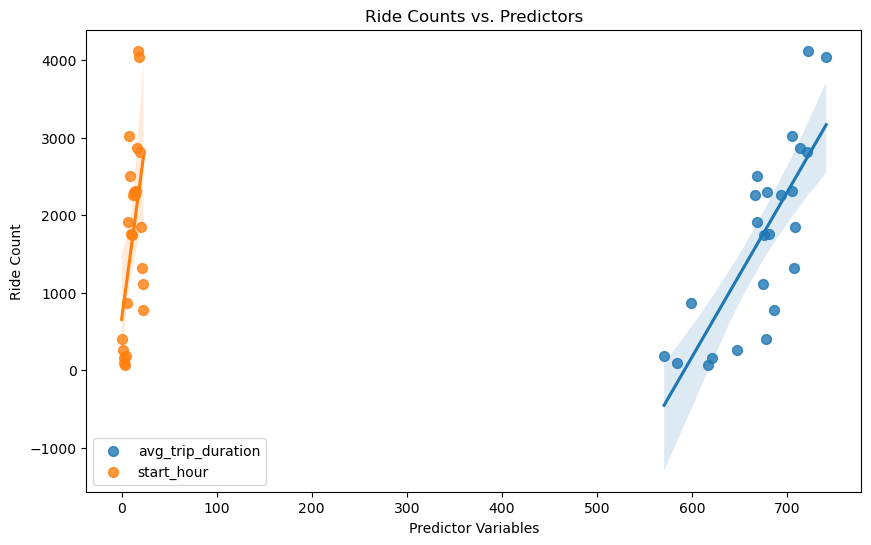

In [136]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Counts vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [137]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]
X = sm.add_constant(X)

In [138]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [139]:
model = sm.OLS(y, X).fit()

In [140]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_trip_duration   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     28.41
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.06e-06
Time:                        21:40:33   Log-Likelihood:                -109.22
No. Observations:                  24   AIC:                             224.4
Df Residuals:                      21   BIC:                             228.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.9446     10.244     59.248      0.0

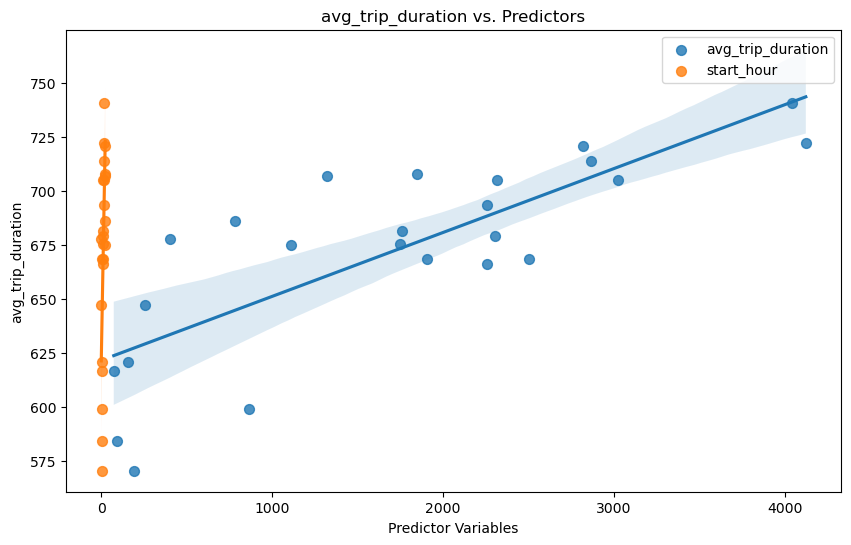

In [141]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ride_count', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [142]:
# Reshape the variables into NumPy arrays
X_avg_trip_duration = hourly_aggregated_filtered['ride_count'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

X_start_hour = hourly_aggregated_filtered['start_hour'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

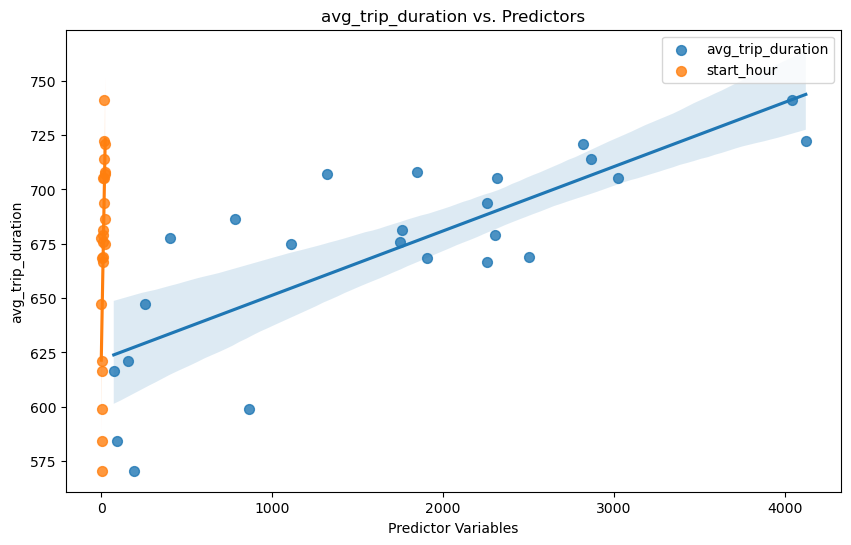

In [143]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_avg_trip_duration, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x=X_start_hour, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [144]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [146]:
# Create a regression object.

regression = LinearRegression()

In [147]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [148]:
# Predict the values of y using X. applying model just to X test

#--By only applying it to the “X_test” data set, you’re telling the model to predict the corresponding y values. Once it does this, you can compare it to the actual y values in the “y_test” data set and determine the accuracy of the model.

y_predicted = regression.predict(X_test)

In [149]:
y_predicted = fitted_model.predict(X_test)

NameError: name 'fitted_model' is not defined

In [150]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (24, 2)
Shape of y: (24,)


In [151]:
y

0     677.868486
1     647.210117
2     620.936709
3     584.422222
4     616.589041
5     570.586387
6     598.979143
7     668.484277
8     705.284155
9     668.774760
10    681.419557
11    675.744133
12    666.543401
13    679.187771
14    693.548915
15    705.407599
16    713.957083
17    722.178554
18    741.052215
19    720.935037
20    708.226190
21    707.300986
22    674.930568
23    686.223077
Name: avg_trip_duration, dtype: float64

In [152]:
X

,ride_count,start_hour
0,403,0
1,257,1
2,158,2
3,90,3
4,73,4
5,191,5
6,863,6
7,1908,7
8,3023,8
9,2504,9


In [153]:
citi_1.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-08-14 18:18:55
1,1,1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-08-14 18:38:53
2,2,2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-08-14 19:44:04
3,3,3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-08-14 11:54:37
4,4,4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-08-14 22:01:01


In [154]:
citi_1_clean=citi_1[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [155]:
citi_1_clean

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-08-14 18:18:55
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-08-14 18:38:53
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-08-14 19:44:04
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-08-14 11:54:37
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-08-14 22:01:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,1,2013-09-28 15:30:14,2013-09-28 15:46:29,10-20 minutes,2013-09-28,2024-08-14 15:30:14
42989,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,1,2013-09-01 16:27:11,2013-09-01 16:52:52,over 20 minutes,2013-09-01,2024-08-14 16:27:11
42990,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2,2013-09-14 17:32:26,2013-09-14 17:52:17,10-20 minutes,2013-09-14,2024-08-14 17:32:26
42991,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2,2013-09-07 18:08:21,2013-09-07 18:25:51,10-20 minutes,2013-09-07,2024-08-14 18:08:21


In [156]:
filtered_citi.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-08-14 18:18:55
1,1,1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-08-14 18:38:53
2,2,2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-08-14 19:44:04
3,3,3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-08-14 11:54:37
4,4,4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-08-14 22:01:01


In [157]:
citi_1_clean=filtered_citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

# Saving to CSV

In [158]:
citi_1_clean.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_6.csv'))